In [2]:
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.decomposition import FastICA

%config InlineBackend.figure_format = 'retina'

In [3]:
import os

data_path = "breast_cancer_dataset/"

files = os.listdir(data_path)
print(files)

['wdbc.data', 'wdbc.names']


In [4]:
import pandas as pd

data_path = "breast_cancer_dataset/"
df = pd.read_csv(data_path + "wdbc.data", header=None)
print(df.head())

         0  1      2      3       4       5        6        7       8   \
0    842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001   
1    842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869   
2  84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974   
3  84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414   
4  84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980   

        9   ...     22     23      24      25      26      27      28      29  \
0  0.14710  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.07017  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.12790  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.10520  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.10430  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       30       31  
0  0.4601  0.11890  
1  0.2750  0.08902  
2  0.

In [5]:
# Remove the first two columns (attributes)
data_no_class_labels = df.drop(columns=[0, 1])

# Display the first few rows of the modified dataset without the first two columns
print("\nDataset without the first two attributes:")
print(data_no_class_labels.head())


Dataset without the first two attributes:
      2      3       4       5        6        7       8        9       10  \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        11  ...     22     23      24      25      26      27      28      29  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

 

In [6]:
data_no_class_labels

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_no_class_labels)
print(data_standardized)
print(data_standardized.shape)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
(569, 30)


In [8]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(data_standardized)
explained_variances = pca.explained_variance_ratio_

In [9]:
df_2d

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [10]:
class_labels = df[[1]]
class_labels

,1
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [11]:
data_df_2d = pd.DataFrame(df_2d, columns=['pc1', 'pc2'])
data_df_2d['class_label'] = class_labels

In [12]:
data_df_2d

,pc1,pc2,class_label
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M
...,...,...,...
564,6.439315,-3.576817,M
565,3.793382,-3.584048,M
566,1.256179,-1.902297,M
567,10.374794,1.672010,M


['M' 'B']


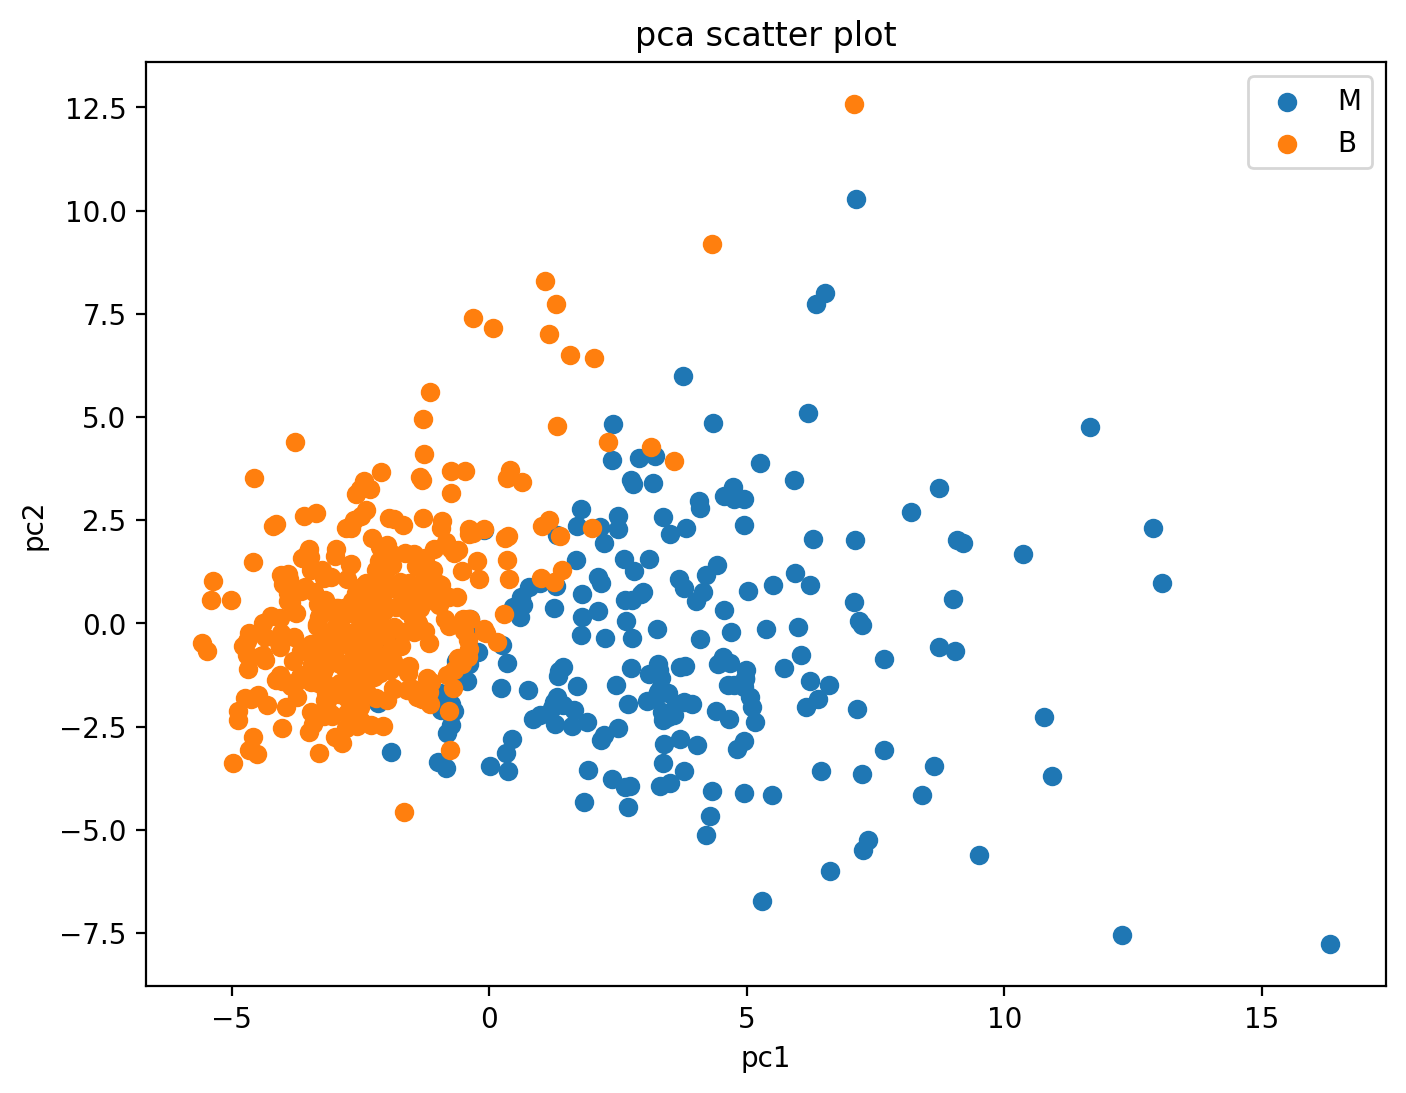

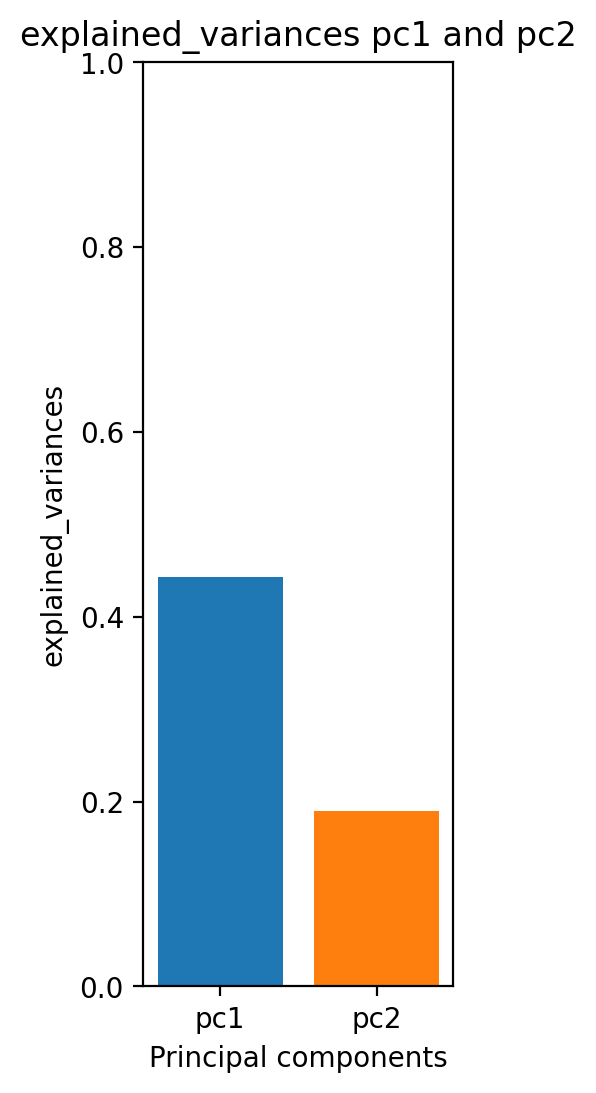

In [38]:
plt.figure(figsize=(8, 6))
unique_cls = data_df_2d['class_label'].unique()
print(unique_cls)
for label in unique_cls:
    X = data_df_2d[data_df_2d['class_label'] == label]
    plt.scatter(X['pc1'], X['pc2'], label=label)

plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('pca scatter plot')
plt.legend()
plt.show()

plt.figure(figsize=(2, 6))
plt.bar(['pc1', 'pc2'], explained_variances, color=['tab:blue', 'tab:orange'])
plt.xlabel('Principal components')
plt.ylabel('explained_variances')
plt.title('explained_variances pc1 and pc2')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for variance ratio
plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

from scipy.stats import multivariate_normal    

import imageio.v3 as iio

c:\Users\Ram\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Ram\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
C:\Users\Ram\AppData\Local\Temp\ipykernel_23124\3628983208.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=responsibilities, cmap='viridis')


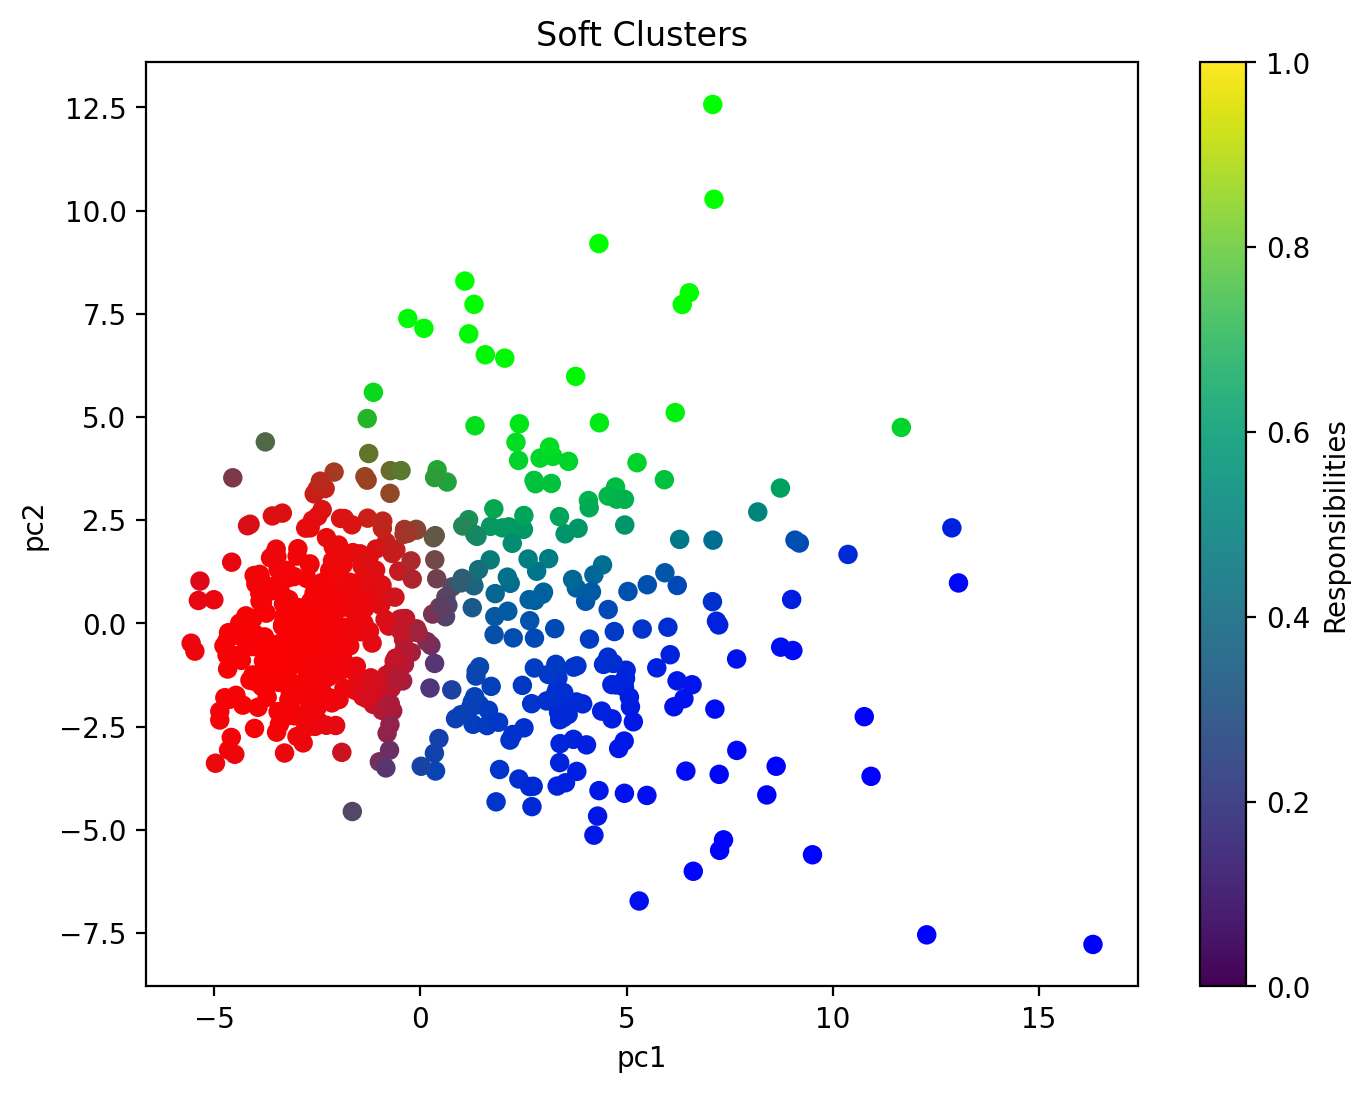

In [15]:
X = df_2d
gm = GaussianMixture(n_components=3, random_state=0).fit(X)
soft_clusters = gm.fit(X)
import matplotlib.pyplot as plt

# Get the responsibilities of each point
responsibilities = soft_clusters.predict_proba(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=responsibilities, cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Soft Clusters')
plt.colorbar(label='Responsibilities')
plt.show()


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_moons

import h5py
import imageio
from PIL import Image 

In [17]:
test_set = data_no_class_labels.iloc[-118:]
test_set

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
451,19.59,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,...,21.440,30.96,139.80,1421.0,0.15280,0.18450,0.39770,0.14660,0.2293,0.06091
452,12.00,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,...,13.090,37.88,85.07,523.7,0.12080,0.18560,0.18110,0.07116,0.2447,0.08194
453,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,...,15.800,16.93,103.10,749.9,0.13470,0.14780,0.13730,0.10690,0.2606,0.07810
454,12.62,17.15,80.62,492.9,0.08583,0.05430,0.02966,0.02272,0.1799,0.05826,...,14.340,22.15,91.62,633.5,0.12250,0.15170,0.18870,0.09851,0.3270,0.07330
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.050,41.61,96.69,705.6,0.11720,0.14210,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [18]:
train_set = data_no_class_labels.iloc[:450]
train_set

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,11.99,24.89,77.61,441.3,0.10300,0.09218,0.05441,0.04274,0.1820,0.06850,...,12.98,30.36,84.48,513.9,0.1311,0.1822,0.1609,0.12020,0.2599,0.08251
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,21.53,38.54,145.40,1437.0,0.1401,0.3762,0.6399,0.19700,0.2972,0.09075
447,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.1226,0.1881,0.2060,0.08308,0.3600,0.07285
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.3779,0.09594,0.2471,0.07463


In [19]:
class_labels_y = df.iloc[:450, 1]
class_labels_y

0      M
1      M
2      M
3      M
4      M
      ..
445    B
446    M
447    B
448    B
449    M
Name: 1, Length: 450, dtype: object

In [20]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(C=4, kernel=kernel)
    svm.fit(train_set, class_labels_y)
    accuracy = svm.score(train_set, class_labels_y)
    accuracies.append(accuracy)
    print(f'SVM classifier accuracy for {kernel} kernel: {accuracy}')

SVM classifier accuracy for linear kernel: 0.9688888888888889
SVM classifier accuracy for poly kernel: 0.9111111111111111
SVM classifier accuracy for rbf kernel: 0.9133333333333333
SVM classifier accuracy for sigmoid kernel: 0.37555555555555553


In [21]:
for i in range(1, 11):
    svm = SVC(C=i, kernel='linear')
    svm.fit(train_set, class_labels_y)
    accuracy = svm.score(train_set, class_labels_y)
    accuracies.append(accuracy)
    print(f'SVM classifier accuracy for {i} C with linear kernel: {accuracy}')

SVM classifier accuracy for 1 C with linear kernel: 0.9711111111111111
SVM classifier accuracy for 2 C with linear kernel: 0.9711111111111111
SVM classifier accuracy for 3 C with linear kernel: 0.9711111111111111
SVM classifier accuracy for 4 C with linear kernel: 0.9688888888888889
SVM classifier accuracy for 5 C with linear kernel: 0.9688888888888889
SVM classifier accuracy for 6 C with linear kernel: 0.9711111111111111
SVM classifier accuracy for 7 C with linear kernel: 0.9688888888888889
SVM classifier accuracy for 8 C with linear kernel: 0.9733333333333334
SVM classifier accuracy for 9 C with linear kernel: 0.9666666666666667
SVM classifier accuracy for 10 C with linear kernel: 0.9688888888888889


In [22]:
df_2d.shape

(569, 2)

In [23]:
class_labels

,1
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [24]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []

for kernel in kernels:
    svm = SVC(C=4, kernel=kernel)
    svm.fit(df_2d, class_labels.values.ravel())
    accuracy = svm.score(df_2d, class_labels.values.ravel())
    accuracies.append(accuracy)
    print(f'SVM classifier accuracy for {kernel} kernel: {accuracy}')



SVM classifier accuracy for linear kernel: 0.9560632688927944
SVM classifier accuracy for poly kernel: 0.9156414762741653
SVM classifier accuracy for rbf kernel: 0.9507908611599297
SVM classifier accuracy for sigmoid kernel: 0.8927943760984183


In [25]:
for i in range(1, 11):
    svm = SVC(C=i, kernel='linear')
    svm.fit(df_2d, class_labels.values.ravel())
    accuracy = svm.score(df_2d, class_labels.values.ravel())
    accuracies.append(accuracy)
    print(f'SVM classifier accuracy for {i} C with linear kernel: {accuracy}')

print(f"Max accuracy regularisation param: {max(accuracies)} at C={np.argmax(accuracies)}" )

SVM classifier accuracy for 1 C with linear kernel: 0.9543057996485061
SVM classifier accuracy for 2 C with linear kernel: 0.9543057996485061
SVM classifier accuracy for 3 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 4 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 5 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 6 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 7 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 8 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 9 C with linear kernel: 0.9560632688927944
SVM classifier accuracy for 10 C with linear kernel: 0.9560632688927944
Max accuracy regularisation param: 0.9560632688927944 at C=0


In [37]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid'), 'C':[1, 10, 100, 1000]}
svc = SVC()
clf = GridSearchCV(svc, parameters,verbose=2)
clf.fit(df_2d, class_labels.values.ravel())

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.0s
[CV] END ...................................C=1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             verbose=2)

In [36]:
clf.best_params_

{'C': 100, 'kernel': 'linear'}